# Importing Libraries for Prediction

In [1]:
from keras.models import load_model
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
import cv2
import numpy as np

# Loading the Model

In [3]:
model = load_model('MODEL')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)       

# Loading Images and Predicting

In [4]:
pred_datagen = ImageDataGenerator(rescale=1./255)
pred_set = pred_datagen.flow_from_directory('prediction',
                                             target_size=(64,64), 
                                             class_mode='categorical',
                                             shuffle = False)

Found 10 images belonging to 2 classes.


In [5]:
pred_prob = model.predict_generator(pred_set)
pred_prob = np.round(pred_prob*100,2)

In [6]:
print(pred_prob)

[[91.25  8.75]
 [98.7   1.3 ]
 [98.82  1.18]
 [93.18  6.82]
 [69.97 30.03]
 [31.23 68.77]
 [10.98 89.02]
 [ 7.75 92.25]
 [ 0.42 99.58]
 [14.14 85.86]]


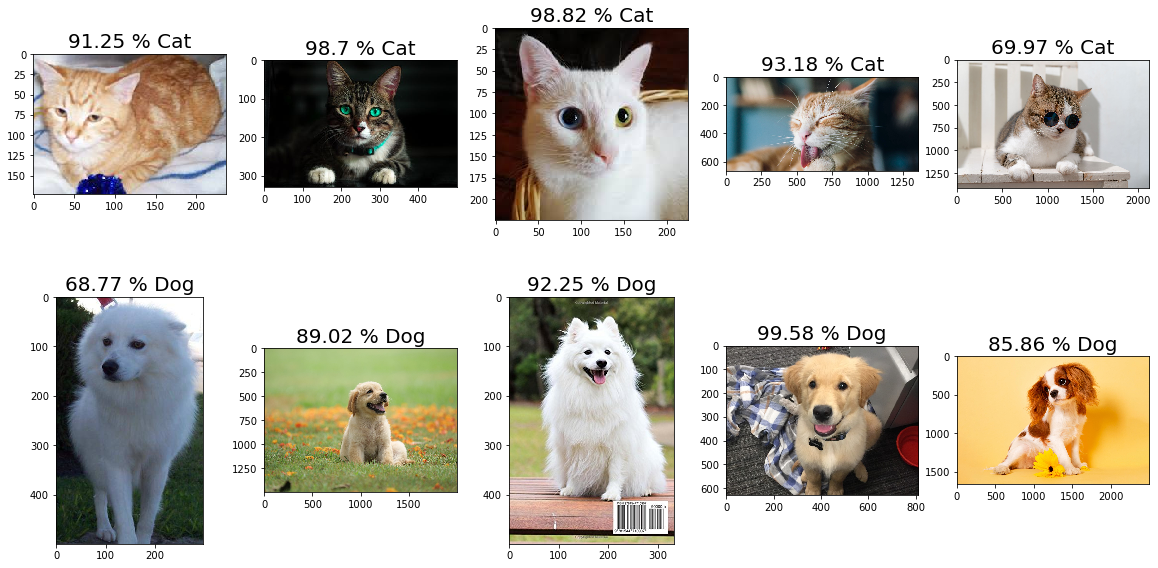

In [7]:
image1 = cv2.imread('prediction/cat/cat_sample_1.jpg')
image2 = cv2.imread('prediction/cat/cat_sample_2.jpg')
image3 = cv2.imread('prediction/cat/cat_sample_3.jpg')
image4 = cv2.imread('prediction/cat/cat_sample_4.jpg')
image5 = cv2.imread('prediction/cat/cat_sample_5.jpg')

image6 = cv2.imread('prediction/dog/dog_sample_1.jpg')
image7 = cv2.imread('prediction/dog/dog_sample_2.jpg')
image8 = cv2.imread('prediction/dog/dog_sample_3.jpg')
image9 = cv2.imread('prediction/dog/dog_sample_4.jpg')
image10 = cv2.imread('prediction/dog/dog_sample_5.jpg')


sample1 = image1[:,:,::-1]
sample2 = image2[:,:,::-1]
sample3 = image3[:,:,::-1]
sample4 = image4[:,:,::-1]
sample5 = image5[:,:,::-1]

sample6 = image6[:,:,::-1]
sample7 = image7[:,:,::-1]
sample8 = image8[:,:,::-1]
sample9 = image9[:,:,::-1]
sample10 = image10[:,:,::-1]

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(2,5,1)
ax2 = fig.add_subplot(2,5,2)
ax3 = fig.add_subplot(2,5,3)
ax4 = fig.add_subplot(2,5,4)
ax5 = fig.add_subplot(2,5,5)
ax6 = fig.add_subplot(2,5,6)
ax7 = fig.add_subplot(2,5,7)
ax8 = fig.add_subplot(2,5,8)
ax9 = fig.add_subplot(2,5,9)
ax10 = fig.add_subplot(2,5,10)

ax1.imshow(sample1)
ax2.imshow(sample2)
ax3.imshow(sample3)
ax4.imshow(sample4)
ax5.imshow(sample5)
ax6.imshow(sample6)
ax7.imshow(sample7)
ax8.imshow(sample8)
ax9.imshow(sample9)
ax10.imshow(sample10)

axis = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]

for i in range(10):
    if pred_prob[i][0] > 50 :
        axis[i].set_title(str(pred_prob[i][0]) +' % Cat',fontsize =20)
    else:
        axis[i].set_title(str(pred_prob[i][1]) +' % Dog',fontsize =20)
    

    
    
plt.show()